### Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, KFold
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction import DictVectorizer
from sklearn.metrics import roc_auc_score, roc_curve

In [2]:
import warnings
warnings.filterwarnings("ignore")

### Loading data

In [3]:
url = 'https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-02-car-price/data.csv'

In [4]:
data = pd.read_csv(url)

In [5]:
data.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [6]:
df = data.copy()

### Data Exploration

In [7]:
df.shape

(11914, 16)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               11914 non-null  object 
 1   Model              11914 non-null  object 
 2   Year               11914 non-null  int64  
 3   Engine Fuel Type   11911 non-null  object 
 4   Engine HP          11845 non-null  float64
 5   Engine Cylinders   11884 non-null  float64
 6   Transmission Type  11914 non-null  object 
 7   Driven_Wheels      11914 non-null  object 
 8   Number of Doors    11908 non-null  float64
 9   Market Category    8172 non-null   object 
 10  Vehicle Size       11914 non-null  object 
 11  Vehicle Style      11914 non-null  object 
 12  highway MPG        11914 non-null  int64  
 13  city mpg           11914 non-null  int64  
 14  Popularity         11914 non-null  int64  
 15  MSRP               11914 non-null  int64  
dtypes: float64(3), int64(5

In [9]:
df.describe(include='all')

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
count,11914,11914,11914.000000,11911,11845.00000,11884.000000,11914,11914,11908.000000,8172,11914,11914,11914.000000,11914.000000,11914.000000,1.191400e+04
unique,48,915,NaN,10,NaN,NaN,5,4,NaN,71,3,16,NaN,NaN,NaN,NaN
top,Chevrolet,Silverado 1500,NaN,regular unleaded,NaN,NaN,AUTOMATIC,front wheel drive,NaN,Crossover,Compact,Sedan,NaN,NaN,NaN,NaN
freq,1123,156,NaN,7172,NaN,NaN,8266,4787,NaN,1110,4764,3048,NaN,NaN,NaN,NaN
mean,NaN,NaN,2010.384338,NaN,249.38607,5.628829,NaN,NaN,3.436093,NaN,NaN,NaN,26.637485,19.733255,1554.911197,4.059474e+04
std,NaN,NaN,7.579740,NaN,109.19187,1.780559,NaN,NaN,0.881315,NaN,NaN,NaN,8.863001,8.987798,1441.855347,6.010910e+04
min,NaN,NaN,1990.000000,NaN,55.00000,0.000000,NaN,NaN,2.000000,NaN,NaN,NaN,12.000000,7.000000,2.000000,2.000000e+03
25%,NaN,NaN,2007.000000,NaN,170.00000,4.000000,NaN,NaN,2.000000,NaN,NaN,NaN,22.000000,16.000000,549.000000,2.100000e+04
50%,NaN,NaN,2015.000000,NaN,227.00000,6.000000,NaN,NaN,4.000000,NaN,NaN,NaN,26.000000,18.000000,1385.000000,2.999500e+04
75%,NaN,NaN,2016.000000,NaN,300.00000,6.000000,NaN,NaN,4.000000,NaN,NaN,NaN,30.000000,22.000000,2009.000000,4.223125e+04


### Checking for null values and duplication

In [10]:
df.isnull().sum()

Make                    0
Model                   0
Year                    0
Engine Fuel Type        3
Engine HP              69
Engine Cylinders       30
Transmission Type       0
Driven_Wheels           0
Number of Doors         6
Market Category      3742
Vehicle Size            0
Vehicle Style           0
highway MPG             0
city mpg                0
Popularity              0
MSRP                    0
dtype: int64

In [11]:
df.duplicated().sum()

715

### Data Preparation

#### Columns to use for the homework

In [12]:
columns_to_use = ['Make','Model', 'Year', 'Engine HP', 'Engine Cylinders', 'Transmission Type',
                  'Vehicle Style', 'highway MPG', 'city mpg', 'MSRP']

In [13]:
df = df[columns_to_use]

In [14]:
df.head()

,Make,Model,Year,Engine HP,Engine Cylinders,Transmission Type,Vehicle Style,highway MPG,city mpg,MSRP
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,Coupe,26,19,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,Convertible,28,19,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,Coupe,28,20,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,Coupe,28,18,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,Convertible,28,18,34500


In [15]:
df.columns = df.columns.str.lower().str.replace(' ', '_')

for col in df.describe(exclude='number').columns:
    df[col] = df[col].str.lower().str.replace(' ', '_')

In [16]:
df.head()

,make,model,year,engine_hp,engine_cylinders,transmission_type,vehicle_style,highway_mpg,city_mpg,msrp
0,bmw,1_series_m,2011,335.0,6.0,manual,coupe,26,19,46135
1,bmw,1_series,2011,300.0,6.0,manual,convertible,28,19,40650
2,bmw,1_series,2011,300.0,6.0,manual,coupe,28,20,36350
3,bmw,1_series,2011,230.0,6.0,manual,coupe,28,18,29450
4,bmw,1_series,2011,230.0,6.0,manual,convertible,28,18,34500


### Filling null values

In [17]:
df.fillna(0, inplace=True)

In [18]:
df.isnull().sum()

make                 0
model                0
year                 0
engine_hp            0
engine_cylinders     0
transmission_type    0
vehicle_style        0
highway_mpg          0
city_mpg             0
msrp                 0
dtype: int64

#### Making new column for clasification

In [19]:
price_mean = df.msrp.mean()
price_mean

40594.737032063116

In [20]:
df['above_average'] = df.msrp.apply(lambda x: 1 if x > price_mean else 0)

In [21]:
df = df.drop(columns='msrp')

In [22]:
df.head()

,make,model,year,engine_hp,engine_cylinders,transmission_type,vehicle_style,highway_mpg,city_mpg,above_average
0,bmw,1_series_m,2011,335.0,6.0,manual,coupe,26,19,1
1,bmw,1_series,2011,300.0,6.0,manual,convertible,28,19,1
2,bmw,1_series,2011,300.0,6.0,manual,coupe,28,20,0
3,bmw,1_series,2011,230.0,6.0,manual,coupe,28,18,0
4,bmw,1_series,2011,230.0,6.0,manual,convertible,28,18,0


In [23]:
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=1)

In [24]:
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=1)

In [25]:
df_train.shape, df_val.shape, df_test.shape

((7148, 10), (2383, 10), (2383, 10))

In [26]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [27]:
y_train = df_train.above_average
y_val = df_val.above_average
y_test = df_test.above_average

In [28]:
del df_train['above_average']
del df_val['above_average']
del df_test['above_average']

### Question 1: ROC AUC feature importance

ROC AUC could also be used to evaluate feature importance of numerical variables.
Let's do that

- For each numerical variable, use it as score and compute AUC with the above_average variable
- Use the training dataset for that
If your AUC is < 0.5, invert this variable by putting "-" in front

(e.g. -df_train['engine_hp'])

AUC can go below 0.5 if the variable is negatively correlated with the target varialble. You can change the direction of the correlation by negating this variable - then negative correlation becomes positive.

Which numerical variable (among the following 4) has the highest AUC?

- **engine_hp**
- engine_cylinders
- highway_mpg
- city_mpg

In [29]:
auc_result = []

for col in df_train.describe().columns:
    res = roc_auc_score(y_train, df_train[col])
    
    if res < 0.5:
        res = roc_auc_score(y_train, -df_train[col])
    auc_result.append((col, res))

In [30]:
df_auc_res = pd.DataFrame(auc_result, columns=['column', 'auc_score'])
df_auc_res.sort_values('auc_score', ascending=False)

,column,auc_score
1,engine_hp,0.917103
2,engine_cylinders,0.766116
0,year,0.687551
4,city_mpg,0.673424
3,highway_mpg,0.633059


### Question 2: Training the model

Apply one-hot-encoding using `DictVectorizer` and train the logistic regression with these parameters:

```python
LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)
```

What's the AUC of this model on the validation dataset? (round to 3 digits)

- 0.678
- 0.779
- 0.878
- 0.979

#### Transforming categorical variables in the training set

In [31]:
dv = DictVectorizer(sparse=False)

train_dict = df_train.to_dict(orient='records')
X_train = dv.fit_transform(train_dict)

#### Making the model

In [32]:
reg = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)

In [33]:
reg.fit(X_train, y_train)

LogisticRegression(max_iter=1000, solver='liblinear')

#### Converting categorical variables on the validation set

In [34]:
val_dicts = df_val.to_dict(orient='records')
X_val = dv.transform(val_dicts)

In [35]:
y_pred = reg.predict_proba(X_val)[:, 1]

In [37]:
round(roc_auc_score(y_val, y_pred), 3)

0.977

### Question 3: Precision and Recall

Now let's compute precision and recall for our model.

* Evaluate the model on all thresholds from 0.0 to 1.0 with step 0.01
* For each threshold, compute precision and recall
* Plot them

At which threshold precision and recall curves intersect?

* 0.28
* 0.48
* 0.68
* 0.88

In [38]:
def confusion_matrix(y_val, y_pred):
    
    result = []
    thresholds = np.linspace(0, 1, 101)
    
    for threshold in thresholds:
        actual_positive = (y_val == 1)
        actual_negative = (y_val == 0)
        
        pred_positive = (y_pred >= threshold)
        pred_negative = (y_pred < threshold)
        
        tp = (actual_positive & pred_positive).sum() 
        tn = (actual_negative & pred_negative).sum()
        fp = (pred_positive & actual_negative).sum()
        fn = (pred_negative & actual_positive).sum()
        
        result.append((threshold, tp, tn, fp, fn))
        
    return pd.DataFrame(result, columns=['threshold', 'tp', 'tn', 'fp', 'fn'])

In [39]:
df_scores = confusion_matrix(y_val, y_pred)

In [40]:
df_scores[::10]

,threshold,tp,tn,fp,fn
0,0.0,654,0,1729,0
10,0.1,643,1384,345,11
20,0.2,622,1511,218,32
30,0.3,606,1570,159,48
40,0.4,588,1620,109,66
50,0.5,567,1653,76,87
60,0.6,522,1680,49,132
70,0.7,490,1693,36,164
80,0.8,440,1712,17,214
90,0.9,347,1725,4,307


#### Calculation Precision and Recall

In [41]:
df_scores['precision'] = df_scores.tp / (df_scores.tp + df_scores.fp)
df_scores['recall'] = df_scores.tp / (df_scores.tp + df_scores.fn)

In [42]:
df_scores[::10]

,threshold,tp,tn,fp,fn,precision,recall
0,0.0,654,0,1729,0,0.274444,1.000000
10,0.1,643,1384,345,11,0.650810,0.983180
20,0.2,622,1511,218,32,0.740476,0.951070
30,0.3,606,1570,159,48,0.792157,0.926606
40,0.4,588,1620,109,66,0.843615,0.899083
50,0.5,567,1653,76,87,0.881804,0.866972
60,0.6,522,1680,49,132,0.914186,0.798165
70,0.7,490,1693,36,164,0.931559,0.749235
80,0.8,440,1712,17,214,0.962801,0.672783
90,0.9,347,1725,4,307,0.988604,0.530581


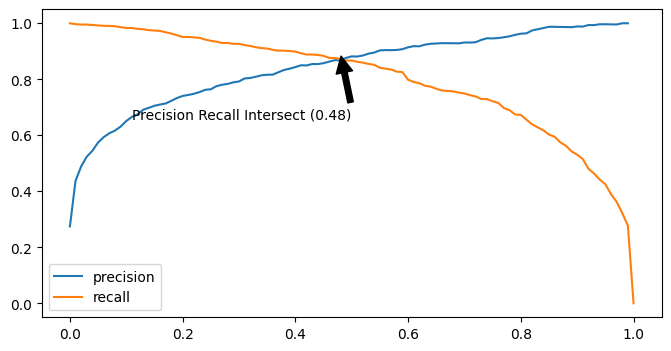

In [43]:
fig, ax = plt.subplots(figsize=(8, 4))
ax.plot(df_scores.threshold, df_scores.precision, label='precision')
ax.plot(df_scores.threshold, df_scores.recall, label='recall')

ax.annotate('Precision Recall Intersect (0.48)',
            xy=(0.48, 0.892523), xycoords='data',
            xytext=(0.5, 0.68), textcoords='axes fraction',
            arrowprops=dict(facecolor='black', shrink=0.05),
            horizontalalignment='right', verticalalignment='top')
plt.legend();

### Question 4: F1 score

Precision and recall are conflicting - when one grows, the other goes down. That's why they are often combined into the F1 score - a metrics that takes into account both

This is the formula for computing F1:

$$F_1 = 2 \cdot \cfrac{P \cdot R}{P + R}$$

Where $P$ is precision and $R$ is recall.

Let's compute F1 for all thresholds from 0.0 to 1.0 with increment 0.01

At which threshold F1 is maximal?

- 0.12
- 0.32
- 0.52
- 0.72

In [44]:
df_scores['F1 Score'] = 2 * ((df_scores.precision * df_scores.recall) / (df_scores.precision + df_scores.recall))

In [45]:
df_scores.sort_values('F1 Score', ascending=False).head()

,threshold,tp,tn,fp,fn,precision,recall,F1 Score
50,0.50,567,1653,76,87,0.881804,0.866972,0.874325
54,0.54,557,1664,65,97,0.895498,0.851682,0.873041
53,0.53,559,1661,68,95,0.891547,0.854740,0.872756
47,0.47,573,1642,87,81,0.868182,0.876147,0.872146
52,0.52,562,1656,73,92,0.885039,0.859327,0.871994


### Question 5: 5-Fold CV


Use the `KFold` class from Scikit-Learn to evaluate our model on 5 different folds:

```
KFold(n_splits=5, shuffle=True, random_state=1)
```

* Iterate over different folds of `df_full_train`
* Split the data into train and validation
* Train the model on train with these parameters: `LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)`
* Use AUC to evaluate the model on validation

How large is standard devidation of the scores across different folds?

- 0.003
- 0.030
- 0.090
- 0.140

### Train and predict functions

In [46]:
def train(df_train, y_train, C=1.0):
    dicts = df_train.to_dict(orient='records')

    dv = DictVectorizer(sparse=False)
    X_train = dv.fit_transform(dicts)

    model = LogisticRegression(solver='liblinear', C=C)
    model.fit(X_train, y_train)

    return dv, model

def predict(df, dv, model):
    dicts = df.to_dict(orient='records')

    X = dv.transform(dicts)
    y_pred = model.predict_proba(X)[:, 1]

    return y_pred

In [47]:
scores = []

kfold = KFold(n_splits=5, shuffle=True, random_state=1)

for train_idx, val_idx in kfold.split(df_full_train):
    df_train = df_full_train.iloc[train_idx]
    df_val = df_full_train.iloc[val_idx]

    y_train = df_train.above_average
    y_val = df_val.above_average

    del df_train['above_average']
    del df_val['above_average']

    dv, model = train(df_train, y_train, C=1.0)
    y_pred = predict(df_val, dv, model)

    auc = roc_auc_score(y_val, y_pred)
    scores.append(auc)

print('%.3f +- %.3f' % (np.mean(scores), np.std(scores)))

0.978 +- 0.001


### Question 6: Hyperparemeter Tuning

Now let's use 5-Fold cross-validation to find the best parameter `C`

* Iterate over the following `C` values: `[0.01, 0.1, 0.5, 10]`
* Initialize `KFold` with the same parameters as previously
* Use these parametes for the model: `LogisticRegression(solver='liblinear', C=C, max_iter=1000)`
* Compute the mean score as well as the std (round the mean and std to 3 decimal digits)

Which `C` leads to the best mean score?

- 0.01
- 0.1
- 0.5
- 10

If you have ties, select the score with the lowest std. If you still have ties, select the smallest `C`.

In [49]:
kfold = KFold(n_splits=5, shuffle=True, random_state=1)

for C in [0.01, 0.1, 0.5, 10]:
    scores = []

    for train_idx, val_idx in kfold.split(df_full_train):
        df_train = df_full_train.iloc[train_idx]
        df_val = df_full_train.iloc[val_idx]

        y_train = df_train.above_average
        y_val = df_val.above_average
    
        del df_train['above_average']
        del df_val['above_average']

        dv, model = train(df_train, y_train, C=C)
        y_pred = predict(df_val, dv, model)

        auc = roc_auc_score(y_val, y_pred)
        scores.append(auc)

    print('C=%4s, %.3f +- %.3f' % (C, np.mean(scores), np.std(scores)))

C=0.01, 0.952 +- 0.002
C= 0.1, 0.972 +- 0.002
C= 0.5, 0.977 +- 0.001
C=  10, 0.982 +- 0.004
